# Árbol de Regresión

## Librerias a usar

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Selección de datos
Utilizamos la separación realizada para el mejor modelo de regresión lineal, también se incluyen variables categóricas consideradas en el análisis exploratorio.

In [36]:
train_data=pd.read_csv("train.csv", encoding="latin1")
columnas_numericas = ['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
                  "TotalBsmtSF", "GrLivArea", "GarageCars", 'WoodDeckSF',
                  "FullBath"]
columnas_categoricas = ["Neighborhood", "ExterQual", "KitchenQual"]
columnas_aUsar = columnas_categoricas + columnas_numericas
_train2 = train_data[columnas_aUsar]

y = train_data["SalePrice"]
X = _train2

print("Columnas usadas (" + str(len(_train2.columns)) + ") :\n"+ str(_train2.columns))

Columnas usadas (12) :
Index(['Neighborhood', 'ExterQual', 'KitchenQual', 'OverallQual',
       'OverallCond', 'YearBuilt', 'BsmtFullBath', 'TotalBsmtSF', 'GrLivArea',
       'GarageCars', 'WoodDeckSF', 'FullBath'],
      dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 12)
(438, 12)
(1021,)
(438,)


In [30]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

# Definir la transformación de columnas
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, columnas_categoricas),
    ('scaler', numerical_preprocessor, columnas_numericas)  # Agregamos las variables numéricas
])

## Modelo 1

In [ ]:
# Definir el pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

# Definir la búsqueda de hiperparámetros
param_grid = {"regressor__max_depth": np.arange(2, 10, 1)}

# Realizar la búsqueda con validación cruzada, para obtener el mejor modelo
modelo1 = GridSearchCV(pipeline, param_grid=param_grid, n_jobs=2, cv=5, scoring="neg_root_mean_squared_error")

modelo1.fit(X_train, y_train)

# Obtener los mejores parámetros
modelo1.best_params_

{'regressor__max_depth': 6}

In [32]:
modelo1_pred = modelo1.predict(X_test)
modelo1_pred

array([134826.92920354, 252250.        , 227792.84444444, 165711.        ,
       239306.63636364, 239306.63636364, 108704.76223776, 108704.76223776,
       161781.5       , 165500.        , 153839.22727273, 208816.        ,
       319769.875     , 193354.16049383, 153839.22727273, 153839.22727273,
       193354.16049383, 250000.        , 108704.76223776, 330123.        ,
       227792.84444444, 134826.92920354, 153839.22727273, 250000.        ,
       134826.92920354, 208816.        , 193354.16049383, 134826.92920354,
       112760.        , 108704.76223776, 134826.92920354, 227792.84444444,
       121859.35      , 344975.5       , 208816.        , 232847.4       ,
       239306.63636364, 217482.72727273, 108704.76223776, 153839.22727273,
       208816.        , 175736.38095238, 153839.22727273, 380870.9       ,
       239306.63636364, 372666.        , 112760.        , 134826.92920354,
       108704.76223776, 134826.92920354, 212000.        , 330123.        ,
       153839.22727273, 1

#### Evaluación

In [33]:
mae = mean_absolute_error(y_test, modelo1_pred)
print(f"MAE: {mae:.4f}")

mse = mean_squared_error(y_test, modelo1_pred)
print(f"MSE: {mse:.4f}")

MAE: 23215.6373
MSE: 1123197488.8256


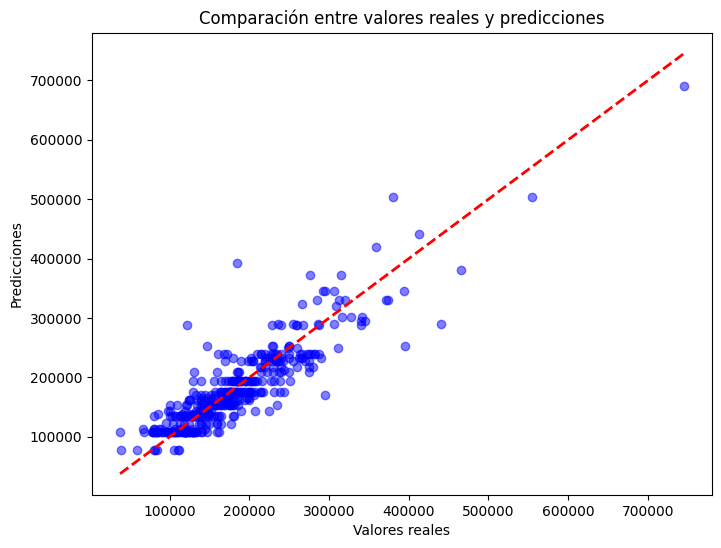

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, modelo1_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

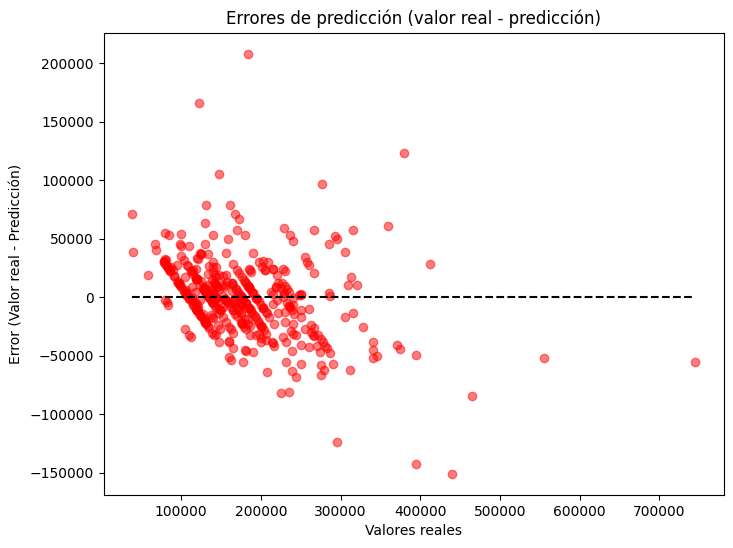

In [35]:
errores = modelo1_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errores, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.title("Errores de predicción (valor real - predicción)")
plt.xlabel("Valores reales")
plt.ylabel("Error (Valor real - Predicción)")
plt.show()

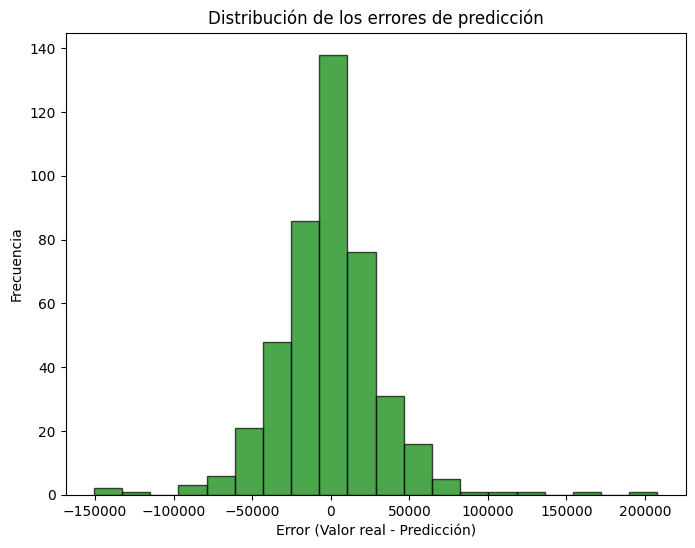

In [40]:
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribución de los errores de predicción")
plt.xlabel("Error (Valor real - Predicción)")
plt.ylabel("Frecuencia")
plt.show()